# Computer Vision 
- In nature a neuron reacts differently from other. Some reacts only on horizontal lines and same to vertical 
- For MNIST it is OK to use DNN with full connectivity but once image pixel size increase 
- CNN solves the problem by using partially connected layers and weight sharing

### Convolutional Neural Network 
- Building block of CNN 
- First CNN layer are not connected to every single pixel in the input image, but only to pixel in thier receptive field.
- In turn each neuron in second layer is connected to only to neurons in small rectangle in the first layer 
- The architecture allows network to concentrate on small low level features in first hidden layer, then assemble into larger higher level feature in the next hidden layer. 
- this herirachial string is common in real life too 
- the corner items are not picked as many times as non corner items - so it is common to add zero layer across the border called ZERO PADDING 
- the shift from one receptive field ot the next is called STRIDE

### Filter 
- Filter are not defined by the user CNN finds the filter and applies to the image. Output after applying filter called FEATURE MAP

### Stacking Multiple Feature Maps 
- CNN has multiple filters and output one feature map per filter 
- It has one neuron per pixel in each feature map. 

### Tenorflow implementation 
- Each input image is typically 3D tensor of shape: - height, width and channels
- Mini Batch is 4D tensor with: - batch size, height, width and channels

In [1]:
from sklearn.datasets import load_sample_image
import tensorflow as tf 
import matplotlib.pyplot as plt 
import matplotlib as mpl

In [2]:
# Pixel intensity for each color channel is represented as a byte from 0 to 255. Scale the feature by dividing by 255. 
china = load_sample_image("china.jpg") / 255.0 
flower = load_sample_image("flower.jpg") / 255.0 

# create numpy error 
import numpy as np 
images = np.array([china, flower])

# get the shape 
images.shape

(2, 427, 640, 3)

(-0.5, 639.5, 426.5, -0.5)

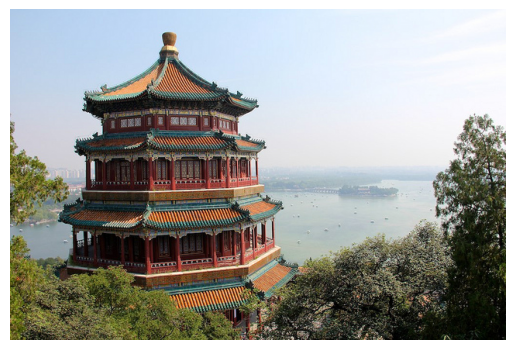

In [3]:
# show the china image 
plt.imshow(china)
plt.axis("off")

(-0.5, 639.5, 426.5, -0.5)

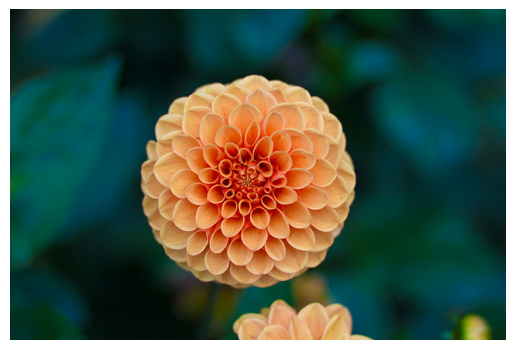

In [4]:
# show the china image 
plt.imshow(flower)
plt.axis("off")

In [5]:
batch_size, height, width, channels = images.shape

# create 2 filter of size 7x7 filters (one with a vertical white line in the middle 
# and the other with a horizontal white line in middle)
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters

array([[[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 

In [6]:
filters.shape

(7, 7, 3, 2)

In [7]:
# vertical line 
filters[:, 3, :, 0] = 1

# horizontanl line 
filters[3, :, :, 1] = 1

``` 
Vertical line

(-0.5, 6.5, 6.5, -0.5)

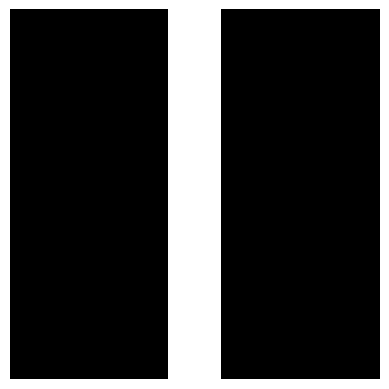

In [8]:
plt.imshow(filters[:, :, :, 0])
plt.axis('off')

```
Horizontal line 

(-0.5, 6.5, 6.5, -0.5)

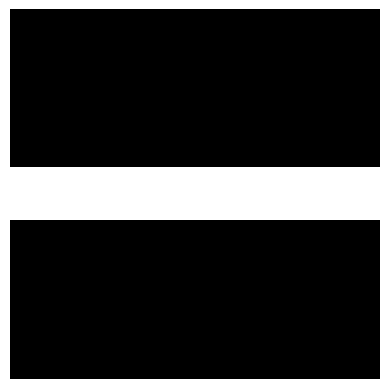

In [9]:
plt.imshow(filters[:, :, :, 1])
plt.axis('off')

In [10]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

In [11]:
def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

2025-07-06 18:35:30.784858: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-07-06 18:35:30.784884: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-07-06 18:35:30.784892: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-07-06 18:35:30.784923: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-07-06 18:35:30.784938: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


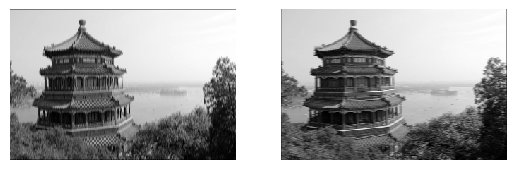

In [12]:
# get the CNN 2D tensor, which is part of tensorflow low level Deep learning api. Use padding="SAME" to put 
# pixel=0 at the border; using stride=2
outputs = tf.nn.conv2d(images, filters, strides=2, padding="SAME")

# plot the feature maps for applying vertical and horizontal filters 
# for image_index in (0, 1):
for feature_map_index in (0, 1):
    plt.subplot(2, 2, 0 * 2 + feature_map_index + 1)
    plot_image(outputs[0, :, :, feature_map_index])

# plt.show()
# plt.imshow(outputs[0, :, :, 0], cmap="gray")
# plt.axis("off")
# plt.show()

In [13]:
outputs.shape

TensorShape([2, 214, 320, 2])

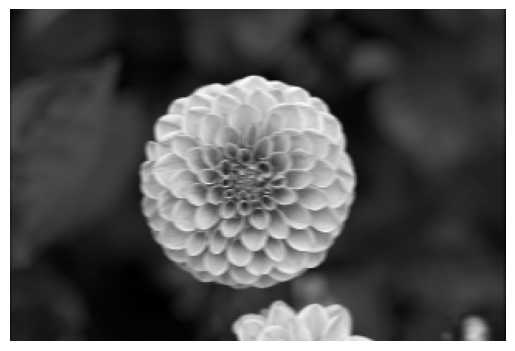

In [14]:
# plot the image
plt.imshow(outputs[1, :, :, 1], cmap="gray")
plt.axis("off")
plt.show()

```
tf.nn.conv2d() line deserves a bit more explanation. 
- images is the input mini-batch (a 4D tensor)
- filters is the set of filters to apply (also 4D tensor)
- strides is equal to 1, but it could also be a 1D array with 4 elements where the two central elements are the vertical and horizontal strides. The first and last element must currently be equal to 1. 
- Padding can be either "same" or "valid". 
    - If set to "same" the CNN layer uses zero padding if necessary. The output size is set to number of input neurons to divided by the stride rounded up. If input size is 13 and stride is 5 the output size is 3 (13/5 = 2.6 rounded to 3). The zeroes are added as evenly as possbile around the inputs, as needed. When strides=1 the layer's output will have the same spatial dimensions (width & height) as its input, hence the name "same". 

    - If set to "valid" the CNN layer does not use zero padding and may ignore some rows and columns at the bottom and right of the input image, depending on the stride. This means that every neuron's receptive field lies strictly within valid position inside the input (it does not go out of the bounds) hence name is "valid".

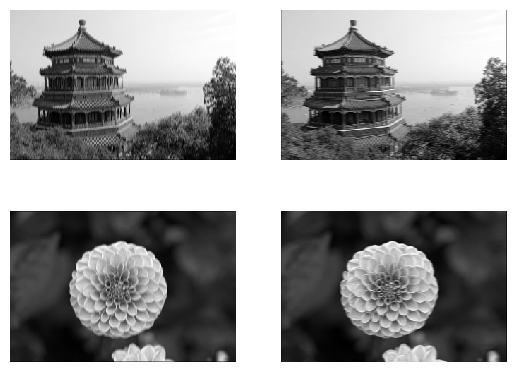

In [15]:
for image_index in (0, 1):
    for feature_map_index in (0, 1):
        plt.subplot(2, 2, image_index * 2 + feature_map_index + 1)
        plot_image(outputs[image_index, :, :, feature_map_index])

plt.show()

In [16]:
def crop(images):
    return images[150:220, 130:250]

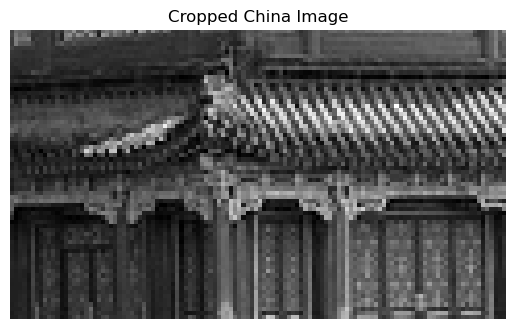

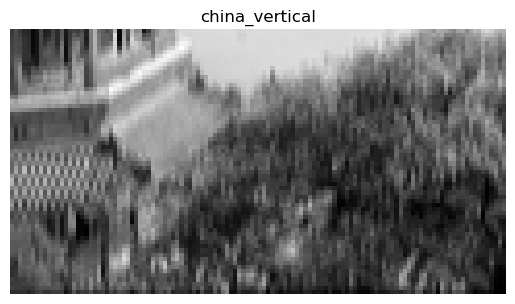

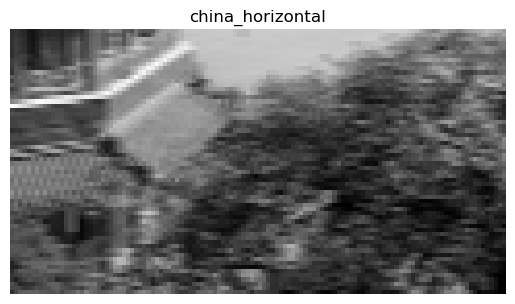

In [17]:
# Crop China Image 
plot_image(crop(images[0, :, :, 0]))
plt.title("Cropped China Image")
plt.show()

# Plot cropped output after appying filters 
for feature_map_index, filename in enumerate(["china_vertical", "china_horizontal"]):
    plot_image(crop(outputs[0, :, :, feature_map_index]))
    plt.title(filename)
    plt.show()

# Convolutional Layer

In [18]:
from tensorflow import keras

# initialize backend 
np.random.seed(42)
tf.random.set_seed(42)

# create CNN Layer
conv = keras.layers.Conv2D(filters=2, kernel_size=7, strides=1,
                           padding="SAME", activation="relu", input_shape=outputs.shape)

In [19]:
conv_outputs = conv(images)
conv_outputs.shape 

TensorShape([2, 427, 640, 2])

```
The output is a 4D tensor. The dimensions are: batch size, height, width, channels. The first dimension (batch size) is 2 since there are 2 input images. The next two dimensions are the height and width of the output feature maps: since padding="SAME" and strides=1, the output feature maps have the same height and width as the input images (in this case, 427×640). Lastly, this convolutional layer has 2 filters, so the last dimension is 2: there are 2 output feature maps per input image.

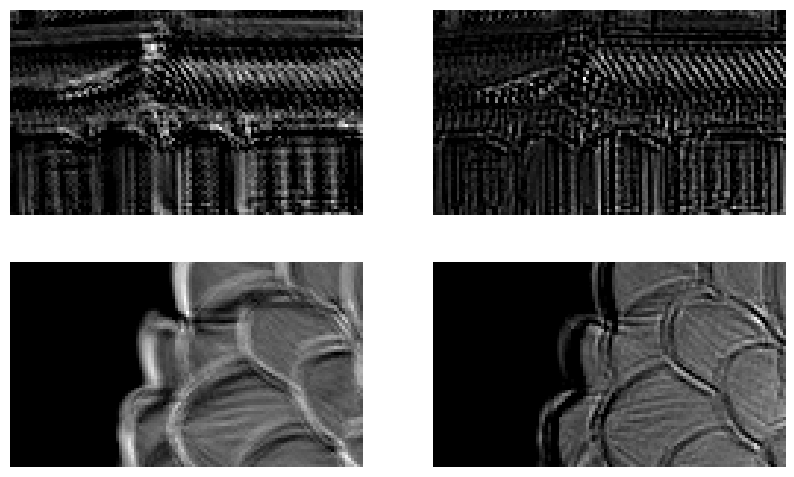

In [20]:
plt.figure(figsize=(10,6))
for image_index in (0, 1):
    for feature_map_index in (0, 1):
        plt.subplot(2, 2, image_index * 2 + feature_map_index + 1)
        plot_image(crop(conv_outputs[image_index, :, :, feature_map_index]))
plt.show()

Although the filters were initialized randomly, the second filter happens to act like an edge detector. Randomly initialized filters often act this way, which is quite fortunate since detecting edges is quite useful in image processing.

If we want, we can set the filters to be the ones we manually defined earlier, and set the biases to zeros (in real life we will almost never need to set filters or biases manually, as the convolutional layer will just learn the appropriate filters and biases during training):

In [21]:
conv.set_weights([filters, np.zeros(2)])

In [22]:
conv_outputs = conv(images)
conv_outputs.shape 

TensorShape([2, 427, 640, 2])

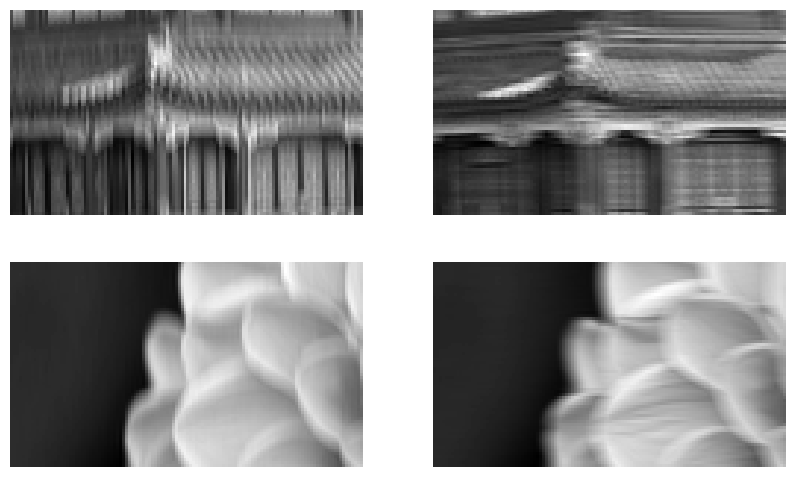

In [23]:

plt.figure(figsize=(10,6))
for image_index in (0, 1):
    for feature_map_index in (0, 1):
        plt.subplot(2, 2, image_index * 2 + feature_map_index + 1)
        plot_image(crop(conv_outputs[image_index, :, :, feature_map_index]))
plt.show()

# VALID & SAME Padding

In [24]:
def feature_map_size(input_size, kernel_size, strides=1, padding="SAME"):
    if padding == "SAME":
        return (input_size - 1) // strides + 1
    else:
        return (input_size - kernel_size) // strides + 1

In [25]:

def pad_before_and_padded_size(input_size, kernel_size, strides=1):

    # get feature map size 
    fmap_size = feature_map_size(input_size, kernel_size, strides)

    # get padding size 
    padded_size = max((fmap_size - 1) * strides + kernel_size, input_size)

    # distribution of padding at both sides 
    pad_before = (padded_size - input_size) // 2

    # return padding details 
    return pad_before, padded_size

In [26]:
def manual_same_padding(images, kernel_size, strides=1):

    # check if kernel size is 1 
    if kernel_size == 1:
        return images.astype(np.float32)
    
    # get shape of the image 
    batch_size, height, width, channels = images.shape

    # get vertical padding for top and padding height for the image 
    top_pad, padded_height = pad_before_and_padded_size(height, kernel_size, strides)

    # get horizontal padding for left and padding width for the image 
    left_pad, padded_width  = pad_before_and_padded_size(width, kernel_size, strides)

    # create padded shape of the image 
    padded_shape = [batch_size, padded_height, padded_width, channels]

    # create padded image 
    padded_images = np.zeros(padded_shape, dtype=np.float32)

    # add padding image
    padded_images[:, top_pad:height+top_pad, left_pad:width+left_pad, :] = images
    
    return padded_images

```
Using "SAME" padding is equivalent to padding manually using manual_same_padding() then using "VALID" padding (confusingly, "VALID" padding means no padding at all):

In [27]:
kernel_size = 7
strides = 2

conv_valid = keras.layers.Conv2D(filters=1, kernel_size=kernel_size, strides=strides, padding="VALID")
conv_same = keras.layers.Conv2D(filters=1, kernel_size=kernel_size, strides=strides, padding="SAME")

valid_output = conv_valid(manual_same_padding(images, kernel_size, strides))

# Need to call build() so conv_same's weights get created
conv_same.build(tf.TensorShape(images.shape))

# Copy the weights from conv_valid to conv_same
conv_same.set_weights(conv_valid.get_weights())

same_output = conv_same(images.astype(np.float32))

assert np.allclose(valid_output.numpy(), same_output.numpy())

# Pooling Layer

In [28]:

max_pool = keras.layers.MaxPool2D(pool_size=2)

In [29]:
cropped_images = np.array([crop(image) for image in images], dtype=np.float32)
output = max_pool(cropped_images)

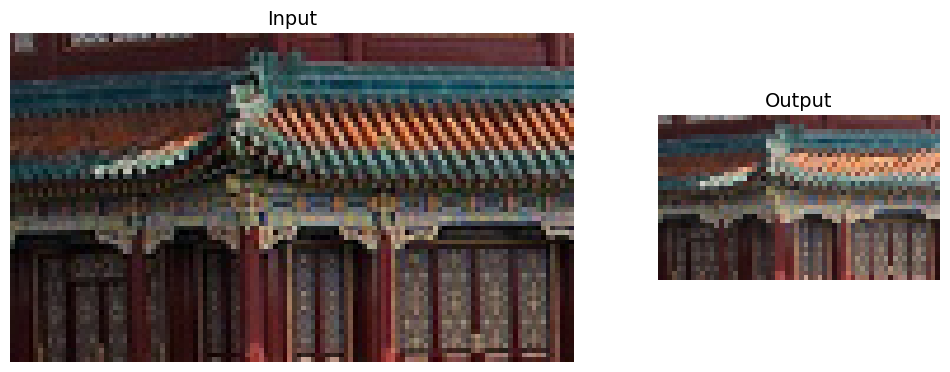

In [31]:
fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input", fontsize=14)
ax1.imshow(cropped_images[0])  # plot the 1st image
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Output", fontsize=14)
ax2.imshow(output[0])  # plot the output for the 1st image
ax2.axis("off")
plt.show()

# Depthwise Pooling

In [32]:
class DepthMaxPool(keras.layers.Layer):
    def __init__(self, pool_size, strides=None, padding="VALID", **kwargs):
        super().__init__(**kwargs)
        if strides is None:
            strides = pool_size
        self.pool_size = pool_size
        self.strides = strides
        self.padding = padding
    def call(self, inputs):
        return tf.nn.max_pool(inputs,
                              ksize=(1, 1, 1, self.pool_size),
                              strides=(1, 1, 1, self.pool_size),
                              padding=self.padding)

In [33]:

depth_pool = DepthMaxPool(3)
with tf.device("/cpu:0"): # there is no GPU-kernel yet
    depth_output = depth_pool(cropped_images)
depth_output.shape

TensorShape([2, 70, 120, 1])

In [34]:
depth_pool = keras.layers.Lambda(lambda X: tf.nn.max_pool(
    X, ksize=(1, 1, 1, 3), strides=(1, 1, 1, 3), padding="VALID"))
with tf.device("/cpu:0"): # there is no GPU-kernel yet
    depth_output = depth_pool(cropped_images)
depth_output.shape

TensorShape([2, 70, 120, 1])

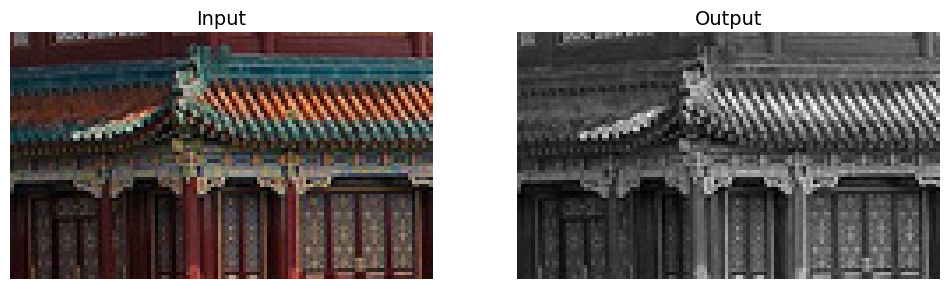

In [35]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.title("Input", fontsize=14)
plot_color_image(cropped_images[0])  # plot the 1st image
plt.subplot(1, 2, 2)
plt.title("Output", fontsize=14)
plot_image(depth_output[0, ..., 0])  # plot the output for the 1st image
plt.axis("off")
plt.show()

# Average Pooling

In [36]:

avg_pool = keras.layers.AvgPool2D(pool_size=2)

In [37]:

output_avg = avg_pool(cropped_images)

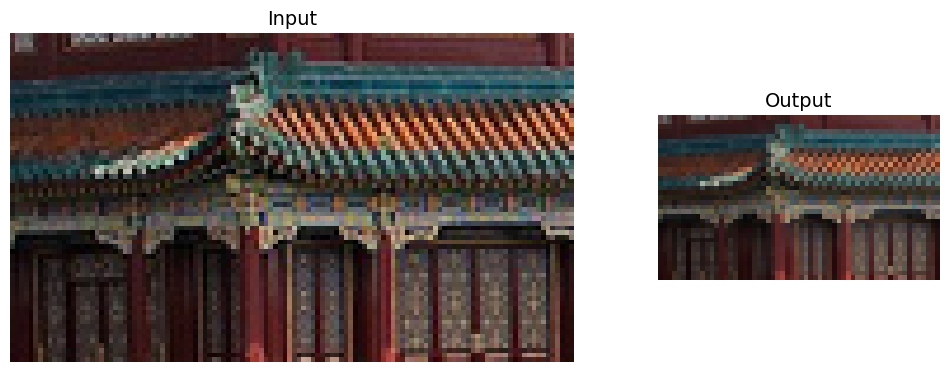

In [38]:
fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input", fontsize=14)
ax1.imshow(cropped_images[0])  # plot the 1st image
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Output", fontsize=14)
ax2.imshow(output_avg[0])  # plot the output for the 1st image
ax2.axis("off")
plt.show()

# Global Average Pooling

In [39]:
global_avg_pool = keras.layers.GlobalAvgPool2D()
global_avg_pool(cropped_images)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.2788777 , 0.2250719 , 0.20967275],
       [0.51288515, 0.4595224 , 0.33423483]], dtype=float32)>

In [40]:
output_global_avg2 = keras.layers.Lambda(lambda X: tf.reduce_mean(X, axis=[1, 2]))
output_global_avg2(cropped_images)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.2788777 , 0.2250719 , 0.20967275],
       [0.51288515, 0.4595224 , 0.33423483]], dtype=float32)>

# MNIST Fashion Problem 

In [ ]:
# Load the dataset 
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

# Calculate mean and standard deviation for training set 
X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7

# Scale the input image vectors 
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

# create new axis for RGG channel and set to 1  
X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [42]:
X_train.shape

(55000, 28, 28, 1)

In [43]:
from functools import partial

# define funciton with partial arguments - this is keras CNN layer which has default activation of ReLU
DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

# create a sequential model 
model = keras.models.Sequential([

    # CNN layer with 64 filters and kernel size 7x7 and input shape for 28x28 with 1 RGB channel i.e. grey
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    # add max pooling layer this will reduce the spatial dimension by 2
    keras.layers.MaxPooling2D(pool_size=2),
    # create CNN layer with 128 filters 
    DefaultConv2D(filters=128),
    # create CNN layer with 128 filters 
    DefaultConv2D(filters=128),
    # another max pool layer with pool_size=2; this will reduce the spatial dimension by 2
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    # add max poolin layer
    keras.layers.MaxPooling2D(pool_size=2),

    # flatten the input 
    keras.layers.Flatten(),

    # create dense layer and 50% drop layer for regularization 
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),

    # output layer with softmax activation layer 
    keras.layers.Dense(units=10, activation='softmax'),
])

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 256)         2

All are trainable parameters 

In [45]:
# compile the model 
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [ ]:
import os, time

# lets create some callbacks for early stopping 
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10)

# create callback for saving the best model 
checkpoint_cb = keras.callbacks.ModelCheckpoint(os.path.join('OUTPUT/Chapter14', "mnist_fashion.keras"), save_best_only=True)

# create callback for tensorboard 
run_id = time.strftime("%Y%m%d%H%M%S")
run_logdir = f'DATA/Tensorboard_Logs/Chater_14_{run_id}'
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [47]:
# start training 
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=20, callbacks=[early_stopping_cb, checkpoint_cb, tensorboard_cb])

Epoch 1/20


2025-07-06 19:20:11.572787: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 51s 28ms/step - loss: 45.0096 - accuracy: 0.6336 - val_loss: 106.4895 - val_accuracy: 0.7402
Epoch 2/20
1719/1719 [==============================] - 47s 27ms/step - loss: 822.2377 - accuracy: 0.7399 - val_loss: 1028.6782 - val_accuracy: 0.7504
Epoch 3/20
1719/1719 [==============================] - 47s 27ms/step - loss: 5747.7144 - accuracy: 0.7598 - val_loss: 3615.3567 - val_accuracy: 0.8194
Epoch 4/20
1719/1719 [==============================] - 47s 27ms/step - loss: 116242.6094 - accuracy: 0.7546 - val_loss: 187066.0000 - val_accuracy: 0.7594
Epoch 5/20
1719/1719 [==============================] - 48s 28ms/step - loss: 356267.2188 - accuracy: 0.7694 - val_loss: 1011671.7500 - val_accuracy: 0.7750
Epoch 6/20
1719/1719 [==============================] - 45s 26ms/step - loss: 1575347.8750 - accuracy: 0.7795 - val_loss: 2003808.8750 - val_accuracy: 0.8122
Epoch 7/20
1719/1719 [==============================] - 47s 27ms/step - loss: 3513169.50

In [48]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 11ms/step - loss: 3505256192.0000 - accuracy: 0.8508


[3505256192.0, 0.8507999777793884]

In [ ]:
X_new = X_test[:10] # pretend we have new images
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 295ms/step


In [53]:
y_pred

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [54]:
y_score = [np.argmax(i) for i in y_pred]
y_score, y_test[:10]

([9, 2, 1, 1, 6, 1, 4, 6, 5, 7],
 array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8))

# ResNet-34

In [55]:
DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, strides=1,
                        padding="SAME", use_bias=False)

class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
            DefaultConv2D(filters, strides=strides),
            keras.layers.BatchNormalization(),
            self.activation,
            DefaultConv2D(filters),
            keras.layers.BatchNormalization()]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                DefaultConv2D(filters, kernel_size=1, strides=strides),
                keras.layers.BatchNormalization()]

    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)

In [56]:
model = keras.models.Sequential()
model.add(DefaultConv2D(64, kernel_size=7, strides=2,
                        input_shape=[224, 224, 3]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="SAME"))
prev_filters = 64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
    strides = 1 if filters == prev_filters else 2
    model.add(ResidualUnit(filters, strides=strides))
    prev_filters = filters
model.add(keras.layers.GlobalAvgPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation="softmax"))

In [57]:

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 112, 112, 64)      9408      
                                                                 
 batch_normalization (Batch  (None, 112, 112, 64)      256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 112, 112, 64)      0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 residual_unit (ResidualUni  (None, 56, 56, 64)        74240     
 t)                                                              
                                                      

# Using Pretrained model 

In [58]:
model = keras.applications.resnet50.ResNet50(weights="imagenet")

102967424/102967424 [==============================] - 8s 0us/step


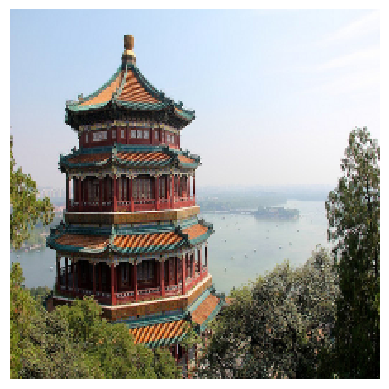

In [59]:
images_resized = tf.image.resize(images, [224, 224])
plot_color_image(images_resized[0])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0000002].


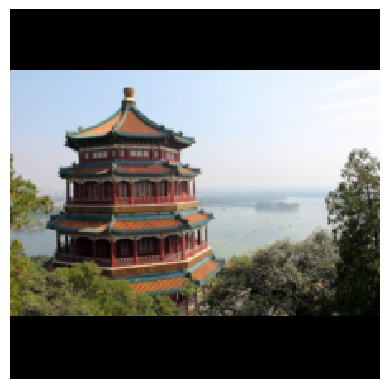

In [60]:
images_resized = tf.image.resize_with_pad(images, 224, 224, antialias=True)
plot_color_image(images_resized[0])

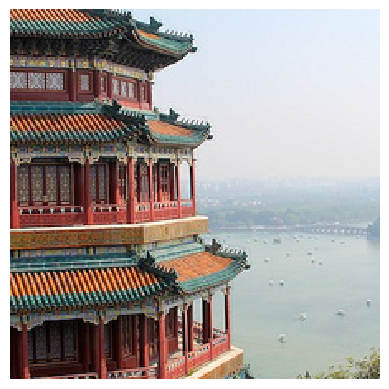

In [61]:
images_resized = tf.image.resize_with_crop_or_pad(images, 224, 224)
plot_color_image(images_resized[0])
plt.show()

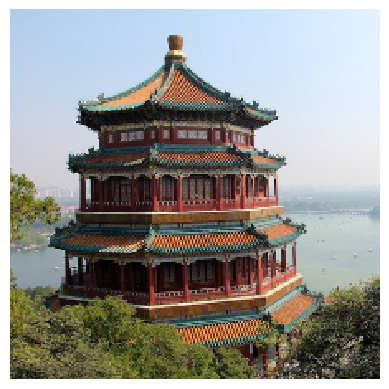

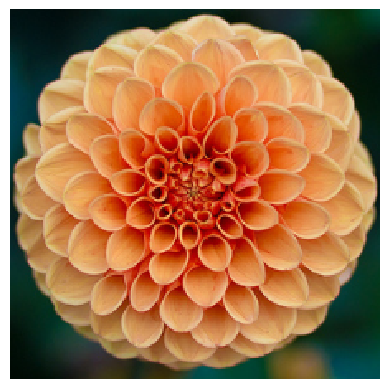

In [62]:
china_box = [0, 0.03, 1, 0.68]
flower_box = [0.19, 0.26, 0.86, 0.7]
images_resized = tf.image.crop_and_resize(images, [china_box, flower_box], [0, 1], [224, 224])
plot_color_image(images_resized[0])
plt.show()
plot_color_image(images_resized[1])
plt.show()

In [63]:
inputs = keras.applications.resnet50.preprocess_input(images_resized * 255)
Y_proba = model.predict(inputs)

1/1 [==============================] - 2s 2s/step


In [64]:

Y_proba.shape

(2, 1000)

In [65]:
top_K = keras.applications.resnet50.decode_predictions(Y_proba, top=3)
for image_index in range(len(images)):
    print("Image #{}".format(image_index))
    for class_id, name, y_proba in top_K[image_index]:
        print("  {} - {:12s} {:.2f}%".format(class_id, name, y_proba * 100))
    print()

35363/35363 [==============================] - 0s 1us/step
Image #0
  n03877845 - palace       43.39%
  n02825657 - bell_cote    43.08%
  n03781244 - monastery    11.69%

Image #1
  n04522168 - vase         53.97%
  n07930864 - cup          9.52%
  n11939491 - daisy        4.96%



# Pretrained Model using Transfer Learning

In [66]:
import tensorflow_datasets as tfds

dataset, info = tfds.load("tf_flowers", as_supervised=True, with_info=True)

/Users/rohitabhishek/miniconda3/envs/mlenv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dl Completed...: 100%|██████████| 1/1 [00:19<00:00, 19.82s/ url]
                                                                        

Dataset tf_flowers downloaded and prepared to /Users/rohitabhishek/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [67]:
info

tfds.core.DatasetInfo(
    name='tf_flowers',
    full_name='tf_flowers/3.0.1',
    description="""
    A large set of images of flowers
    """,
    homepage='https://www.tensorflow.org/tutorials/load_data/images',
    data_dir='/Users/rohitabhishek/tensorflow_datasets/tf_flowers/3.0.1',
    file_format=tfrecord,
    download_size=218.21 MiB,
    dataset_size=221.83 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=5),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'train': <SplitInfo num_examples=3670, num_shards=2>,
    },
    citation="""@ONLINE {tfflowers,
    author = "The TensorFlow Team",
    title = "Flowers",
    month = "jan",
    year = "2019",
    url = "http://download.tensorflow.org/example_images/flower_photos.tgz" }""",
)

In [68]:
info.splits

{Split('train'): <SplitInfo num_examples=3670, num_shards=2>}

In [70]:
info.splits["train"]

<SplitInfo num_examples=3670, num_shards=2>

In [71]:
# get the class names 
class_names = info.features["label"].names
class_names

['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']

In [72]:
n_classes = info.features["label"].num_classes

In [73]:
dataset_size = info.splits["train"].num_examples
dataset_size

3670

In [74]:
# split the dataset 
test_set_raw, valid_set_raw, train_set_raw = tfds.load(
    "tf_flowers",
    split=["train[:10%]", "train[10%:25%]", "train[25%:]"],
    as_supervised=True)

2025-07-12 18:42:04.904247: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


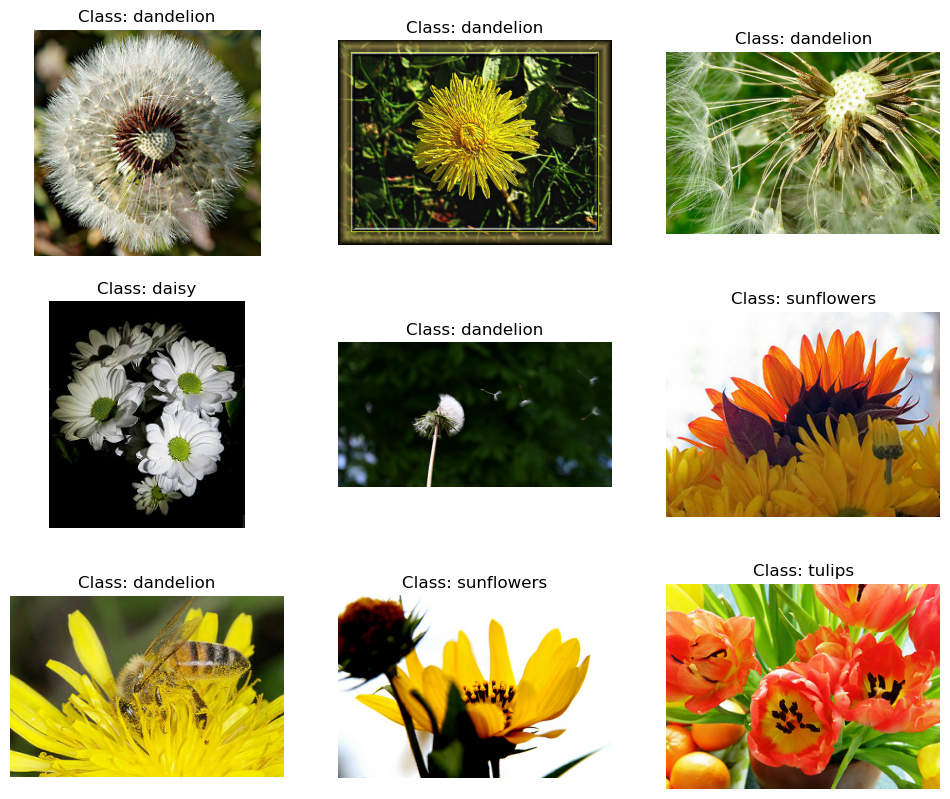

In [75]:
plt.figure(figsize=(12, 10))
index = 0
for image, label in train_set_raw.take(9):
    index += 1
    plt.subplot(3, 3, index)
    plt.imshow(image)
    plt.title("Class: {}".format(class_names[label]))
    plt.axis("off")

plt.show()

In [76]:
def preprocess(image, label):
    resized_image = tf.image.resize(image, [224, 224])
    final_image = keras.applications.xception.preprocess_input(resized_image)
    return final_image, label

In [ ]:
def central_crop(image):
    shape = tf.shape(image)
    min_dim = tf.reduce_min([shape[0], shape[1]])
    top_crop = (shape[0] - min_dim) // 4
    bottom_crop = shape[0] - top_crop
    left_crop = (shape[1] - min_dim) // 4
    right_crop = shape[1] - left_crop
    return image[top_crop:bottom_crop, left_crop:right_crop]

def random_crop(image):
    shape = tf.shape(image)
    min_dim = tf.reduce_min([shape[0], shape[1]]) * 90 // 100
    return tf.image.random_crop(image, [min_dim, min_dim, 3])

def preprocess(image, label, randomize=False):
    if randomize:
        cropped_image = random_crop(image)
        cropped_image = tf.image.random_flip_left_right(cropped_image)
    else:
        cropped_image = central_crop(image)
    resized_image = tf.image.resize(cropped_image, [224, 224])
    final_image = keras.applications.xception.preprocess_input(resized_image)
    return final_image, label

# set the batch size 
batch_size = 32

# create train set
train_set = train_set_raw.shuffle(1000).repeat()

# perform data augmentation on training set samples and create batches 
train_set = train_set.map(partial(preprocess, randomize=True)).batch(batch_size).prefetch(1)

# perform same for test and validation set
valid_set = valid_set_raw.map(preprocess).batch(batch_size).prefetch(1)
test_set = test_set_raw.map(preprocess).batch(batch_size).prefetch(1)

2025-07-12 18:43:40.282331: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


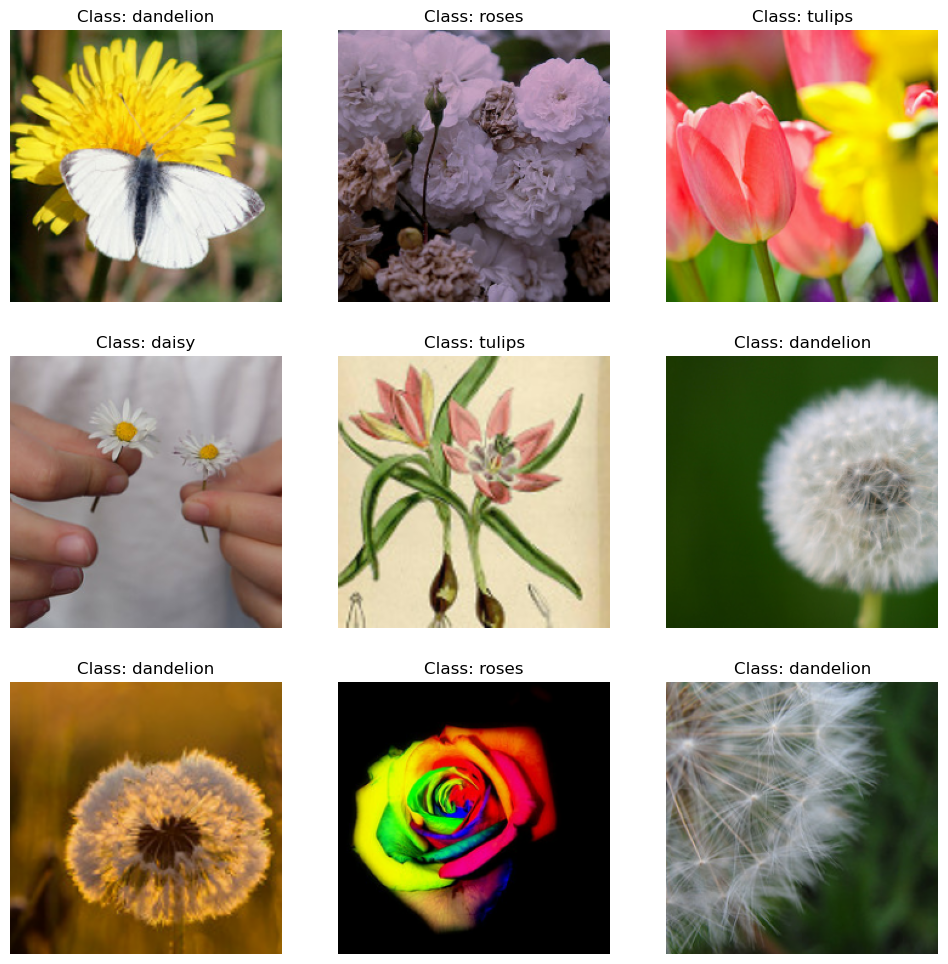

In [ ]:
# plot figure for first batch 
plt.figure(figsize=(12, 12))
for X_batch, y_batch in train_set.take(1):
    for index in range(9):
        plt.subplot(3, 3, index + 1)
        plt.imshow(X_batch[index] / 2 + 0.5)
        plt.title("Class: {}".format(class_names[y_batch[index]]))
        plt.axis("off")

plt.show()

2025-07-12 18:46:03.355577: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


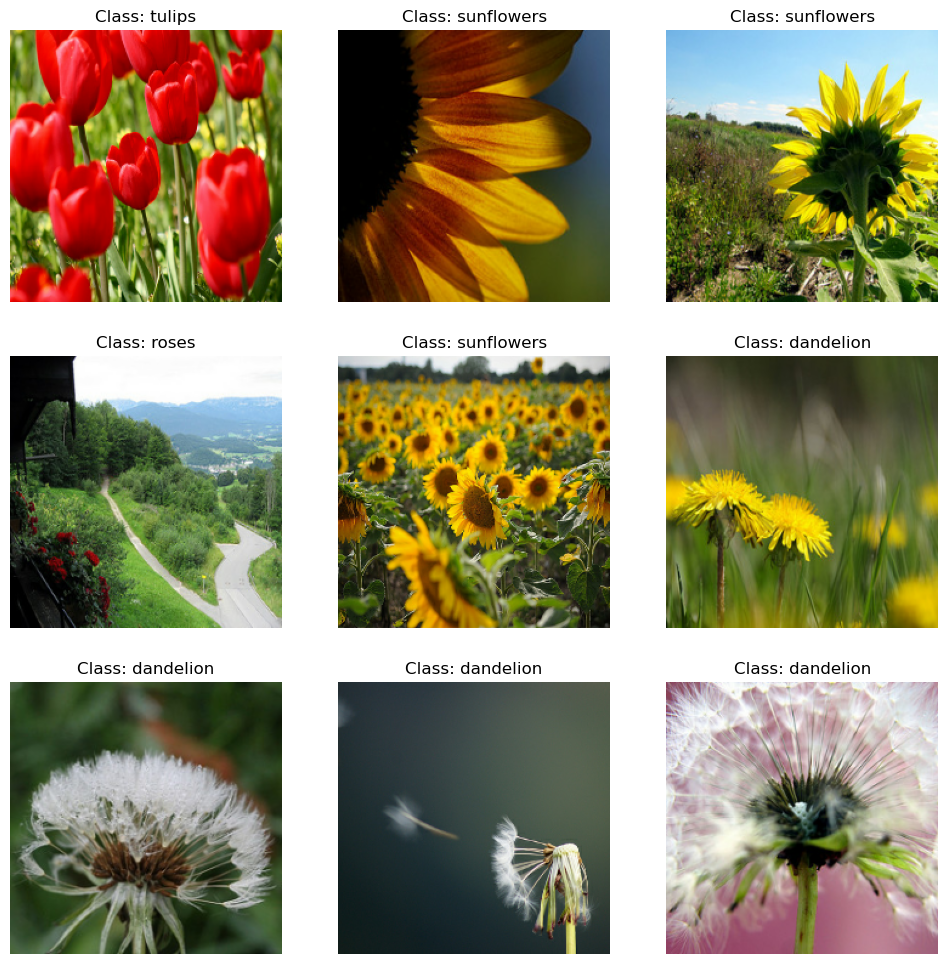

In [79]:
# just check the images in the testing stack 
plt.figure(figsize=(12, 12))
for X_batch, y_batch in test_set.take(1):
    for index in range(9):
        plt.subplot(3, 3, index + 1)
        plt.imshow(X_batch[index] / 2 + 0.5)
        plt.title("Class: {}".format(class_names[y_batch[index]]))
        plt.axis("off")

plt.show()

In [80]:
# get Xception pretrained model as pretrained model except last layer
base_model = keras.applications.xception.Xception(weights="imagenet",
                                                  include_top=False)

# create global average pooling layer
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)

# create output layer 
output = keras.layers.Dense(n_classes, activation="softmax")(avg)

# create functional model of inputs same as base model input
model = keras.models.Model(inputs=base_model.input, outputs=output)

83683744/83683744 [==============================] - 7s 0us/step


In [82]:
# lets check the layers 
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, None, None, 32)       864       ['input_2[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, None, None, 32)       128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, None, None, 32)       0         ['block1_conv1_bn[0][0]'] 

In [83]:
# check thge layers 
for index, layer in enumerate(base_model.layers):
    print(index, layer.name)

0 input_2
1 block1_conv1
2 block1_conv1_bn
3 block1_conv1_act
4 block1_conv2
5 block1_conv2_bn
6 block1_conv2_act
7 block2_sepconv1
8 block2_sepconv1_bn
9 block2_sepconv2_act
10 block2_sepconv2
11 block2_sepconv2_bn
12 conv2d_44
13 block2_pool
14 batch_normalization_36
15 add
16 block3_sepconv1_act
17 block3_sepconv1
18 block3_sepconv1_bn
19 block3_sepconv2_act
20 block3_sepconv2
21 block3_sepconv2_bn
22 conv2d_45
23 block3_pool
24 batch_normalization_37
25 add_1
26 block4_sepconv1_act
27 block4_sepconv1
28 block4_sepconv1_bn
29 block4_sepconv2_act
30 block4_sepconv2
31 block4_sepconv2_bn
32 conv2d_46
33 block4_pool
34 batch_normalization_38
35 add_2
36 block5_sepconv1_act
37 block5_sepconv1
38 block5_sepconv1_bn
39 block5_sepconv2_act
40 block5_sepconv2
41 block5_sepconv2_bn
42 block5_sepconv3_act
43 block5_sepconv3
44 block5_sepconv3_bn
45 add_3
46 block6_sepconv1_act
47 block6_sepconv1
48 block6_sepconv1_bn
49 block6_sepconv2_act
50 block6_sepconv2
51 block6_sepconv2_bn
52 block6_se

In [86]:
for layer in base_model.layers:
    layer.trainable = False

optimizer = keras.optimizers.SGD(learning_rate=0.2, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

history = model.fit(train_set,
                    steps_per_epoch=int(0.75 * dataset_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(0.15 * dataset_size / batch_size),
                    epochs=5)

Epoch 1/5


2025-07-12 18:52:24.915486: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node SGD/AssignVariableOp.


86/86 [==============================] - 26s 271ms/step - loss: 1.6631 - accuracy: 0.7834 - val_loss: 1.1053 - val_accuracy: 0.8254
Epoch 2/5
86/86 [==============================] - 23s 263ms/step - loss: 0.9519 - accuracy: 0.8688 - val_loss: 1.1114 - val_accuracy: 0.8658
Epoch 3/5
86/86 [==============================] - 23s 263ms/step - loss: 0.9304 - accuracy: 0.8852 - val_loss: 1.5531 - val_accuracy: 0.8438
Epoch 4/5
86/86 [==============================] - 23s 263ms/step - loss: 0.4949 - accuracy: 0.9222 - val_loss: 1.1175 - val_accuracy: 0.8695
Epoch 5/5
86/86 [==============================] - 23s 264ms/step - loss: 0.4447 - accuracy: 0.9208 - val_loss: 1.3352 - val_accuracy: 0.8585


In [87]:
model.evaluate(test_set)

12/12 [==============================] - 4s 262ms/step - loss: 1.4142 - accuracy: 0.8692


[1.4141682386398315, 0.8692098259925842]

In [88]:
# lets make the model trainable 
for layer in base_model.layers:
    layer.trainable = True

optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9,
                                 nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, None, None, 32)       864       ['input_2[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, None, None, 32)       128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, None, None, 32)       0         ['block1_conv1_bn[0][0]'] 

In [89]:
history = model.fit(train_set,
                    steps_per_epoch=int(0.75 * dataset_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(0.15 * dataset_size / batch_size),
                    epochs=40)

Epoch 1/40


2025-07-12 18:56:01.850732: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node SGD/AssignVariableOp.


86/86 [==============================] - 74s 767ms/step - loss: 0.4388 - accuracy: 0.8699 - val_loss: 0.5769 - val_accuracy: 0.8235
Epoch 2/40
86/86 [==============================] - 65s 755ms/step - loss: 0.1607 - accuracy: 0.9466 - val_loss: 0.3647 - val_accuracy: 0.8805
Epoch 3/40
86/86 [==============================] - 65s 753ms/step - loss: 0.0858 - accuracy: 0.9749 - val_loss: 0.2780 - val_accuracy: 0.9026
Epoch 4/40
86/86 [==============================] - 65s 753ms/step - loss: 0.0665 - accuracy: 0.9815 - val_loss: 0.2449 - val_accuracy: 0.9210
Epoch 5/40
86/86 [==============================] - 65s 755ms/step - loss: 0.0436 - accuracy: 0.9880 - val_loss: 0.2988 - val_accuracy: 0.9136
Epoch 6/40
86/86 [==============================] - 65s 758ms/step - loss: 0.0303 - accuracy: 0.9920 - val_loss: 0.3460 - val_accuracy: 0.9062
Epoch 7/40
86/86 [==============================] - 65s 752ms/step - loss: 0.0329 - accuracy: 0.9887 - val_loss: 0.3569 - val_accuracy: 0.9081
Epoch 8/40

# Classification and Localization 

In [90]:
base_model = keras.applications.xception.Xception(weights="imagenet",
                                                  include_top=False)
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
class_output = keras.layers.Dense(n_classes, activation="softmax")(avg)
loc_output = keras.layers.Dense(4)(avg)
model = keras.models.Model(inputs=base_model.input,
                           outputs=[class_output, loc_output])
model.compile(loss=["sparse_categorical_crossentropy", "mse"],
              loss_weights=[0.8, 0.2], # depends on what you care most about
              optimizer=optimizer, metrics=["accuracy"])

In [91]:
def add_random_bounding_boxes(images, labels):
    fake_bboxes = tf.random.uniform([tf.shape(images)[0], 4])
    return images, (labels, fake_bboxes)

fake_train_set = train_set.take(5).repeat(2).map(add_random_bounding_boxes)

In [ ]:
model.fit(fake_train_set, steps_per_epoch=5, epochs=2)

Epoch 1/2


KeyError: in user code:

    File "/Users/rohitabhishek/miniconda3/envs/mlenv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/Users/rohitabhishek/miniconda3/envs/mlenv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/rohitabhishek/miniconda3/envs/mlenv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/Users/rohitabhishek/miniconda3/envs/mlenv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1154, in train_step
        self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/Users/rohitabhishek/miniconda3/envs/mlenv/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 544, in minimize
        self.apply_gradients(grads_and_vars)
    File "/Users/rohitabhishek/miniconda3/envs/mlenv/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1223, in apply_gradients
        return super().apply_gradients(grads_and_vars, name=name)
    File "/Users/rohitabhishek/miniconda3/envs/mlenv/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 652, in apply_gradients
        iteration = self._internal_apply_gradients(grads_and_vars)
    File "/Users/rohitabhishek/miniconda3/envs/mlenv/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1253, in _internal_apply_gradients
        return tf.__internal__.distribute.interim.maybe_merge_call(
    File "/Users/rohitabhishek/miniconda3/envs/mlenv/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1345, in _distributed_apply_gradients_fn
        distribution.extended.update(
    File "/Users/rohitabhishek/miniconda3/envs/mlenv/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1342, in apply_grad_to_update_var  **
        return self._update_step(grad, var)
    File "/Users/rohitabhishek/miniconda3/envs/mlenv/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 233, in _update_step
        raise KeyError(

    KeyError: 'The optimizer cannot recognize variable block1_conv1/kernel:0. This usually means you are trying to call the optimizer to update different parts of the model separately. Please call `optimizer.build(variables)` with the full list of trainable variables before the training loop or use legacy optimizer `tf.keras.optimizers.legacy.SGD.'


# Mean Average Map (mAP)

In [93]:
def maximum_precisions(precisions):
    return np.flip(np.maximum.accumulate(np.flip(precisions)))

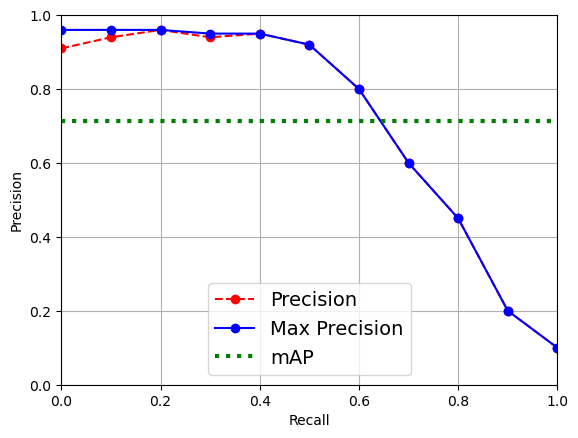

In [94]:
recalls = np.linspace(0, 1, 11)

precisions = [0.91, 0.94, 0.96, 0.94, 0.95, 0.92, 0.80, 0.60, 0.45, 0.20, 0.10]
max_precisions = maximum_precisions(precisions)
mAP = max_precisions.mean()
plt.plot(recalls, precisions, "ro--", label="Precision")
plt.plot(recalls, max_precisions, "bo-", label="Max Precision")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.plot([0, 1], [mAP, mAP], "g:", linewidth=3, label="mAP")
plt.grid(True)
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower center", fontsize=14)
plt.show()

In [95]:
tf.random.set_seed(42)
X = images_resized.numpy()

conv_transpose = keras.layers.Conv2DTranspose(filters=5, kernel_size=3, strides=2, padding="VALID")
output = conv_transpose(X)
output.shape

TensorShape([2, 449, 449, 5])

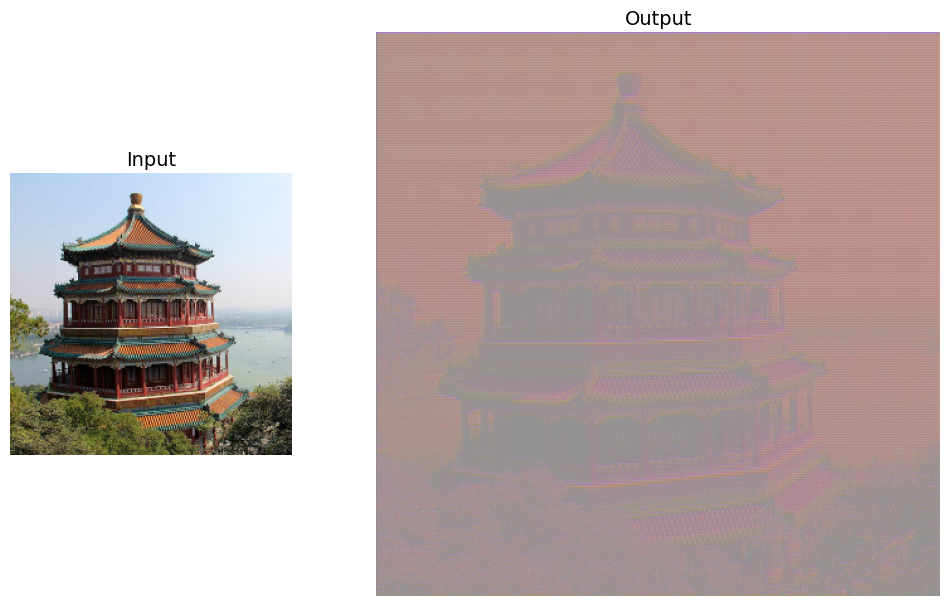

In [96]:
def normalize(X):
    return (X - tf.reduce_min(X)) / (tf.reduce_max(X) - tf.reduce_min(X))

fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[1, 2])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input", fontsize=14)
ax1.imshow(X[0])  # plot the 1st image
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Output", fontsize=14)
ax2.imshow(normalize(output[0, ..., :3]), interpolation="bicubic")  # plot the output for the 1st image
ax2.axis("off")
plt.show()

In [97]:
def upscale_images(images, stride, kernel_size):
    batch_size, height, width, channels = images.shape
    upscaled = np.zeros((batch_size,
                         (height - 1) * stride + 2 * kernel_size - 1,
                         (width - 1) * stride + 2 * kernel_size - 1,
                         channels))
    upscaled[:,
             kernel_size - 1:(height - 1) * stride + kernel_size:stride,
             kernel_size - 1:(width - 1) * stride + kernel_size:stride,
             :] = images
    return upscaled

In [98]:
upscaled = upscale_images(X, stride=2, kernel_size=3)
weights, biases = conv_transpose.weights
reversed_filters = np.flip(weights.numpy(), axis=[0, 1])
reversed_filters = np.transpose(reversed_filters, [0, 1, 3, 2])
manual_output = tf.nn.conv2d(upscaled, reversed_filters, strides=1, padding="VALID")

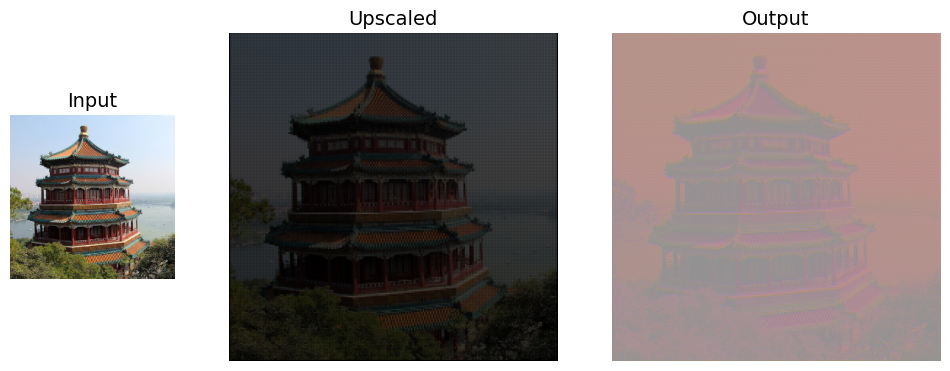

In [99]:
def normalize(X):
    return (X - tf.reduce_min(X)) / (tf.reduce_max(X) - tf.reduce_min(X))

fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=3, width_ratios=[1, 2, 2])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input", fontsize=14)
ax1.imshow(X[0])  # plot the 1st image
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Upscaled", fontsize=14)
ax2.imshow(upscaled[0], interpolation="bicubic")
ax2.axis("off")
ax3 = fig.add_subplot(gs[0, 2])
ax3.set_title("Output", fontsize=14)
ax3.imshow(normalize(manual_output[0, ..., :3]), interpolation="bicubic")  # plot the output for the 1st image
ax3.axis("off")
plt.show()

In [100]:
np.allclose(output, manual_output.numpy(), atol=1e-7)

True

# Exercises 

```
Q1. Advantages of CNN over fully connected DNN for image classification 
Ans: a. Consecutive layers are only partially connected and because it heavily reuses its weights, CNN has many fewer parameters than a fully connected DNN which makes it faster to train and reduce the risk of overfitting and require much less training data. 
b. If CNN has learned a kernel that can detect a particular feature, it can detect the feature anywhere in the image. In contrast DNN learns feature in one location, it can detect it only in particular location. Since images typically have very repetitive features, CNN are able to generalize much better than DNNs for image processing tasks such as classification using fewer training examples. 
c. Finally, DNN has no prior knowledge of how pixels are organized; it does not know nearly pixels are close. CNN architecture embeds this prior knowledge. Lower layer typically identifies features into larger features. this works well with most natural images giving CNN a decisive head start compared to DNN 

Q2. CNN composed of 3 convolutional layers with each 3x3 kernels a stride of 2 and "same" padding. The lowest layers outputs 100 feature maps the middle outputs 200 feature maps and topmost layer outputs 400 feature maps, Input image is 200 x 300 pixels 
What is the total number of parameters in CNN? If using float32 how RAM is required for prediction of single instance? What about training a mini-batch of 50 images 
Ans: 

a. First layer kernel size is 3x3 and input has 3 channels (RGB). Each feature map has 3x3x3 weights plus bias = 28 parameters per feature map  = 28 x 100 = 2800 parameters 
Second layer kernel size is 3x3 and input has 100 features maps from previous layer. Each feature map will have 3 x 3 x 100 plus bias = 900 parameters per 200 feature maps = 901 x 200 = 180200 parameters 
Third layer kernel size is 3x3 and input has 200 feature maps. Each feature map will be 3 x 3 x 200 = 1800 + bias = 1801. Since this layer has 400 feature maps  1801 x 400 = 720400 parameters 
Total 2800 + 180200 + 720400 = 903400 parameters 

b. Calculation for RAM 
stride = 2 
padding = same 
horizontal and vertical dimesions of feature map are 100 x 150 at first layer 
second layer will have feature map with dimension = 50 x 75 
third layer will have feature map dimension = 25 x 38 

Since 32 bit is 4 bytes 
first layer has 100 feature maps; 4 x 100 x 150 x 100 = 6millions bytes = 6MB 
seconf layer has 200 feature maps; 4 x 200 x 50 x 75 = 3 MB 
thrid layer has 400 feature maps; 4 x 400 x 25 x 38 = 1.5 MB 
Total RAM taken will be 6 +3 = 9 MB (as once it goes to third layer; first layer will be released. So max is when it is in first and second layer)
Memory occupied by CNN parameters = 903400 parameters x 4 = 3,613,600 = 3.6MB 

Grand Total = 12.6MB


c. For mini batch of size 50 images; 
for single instance we need 12.6MB. Total 50 image per batch will require = 12.5 x 50 = 525 MB 
RAM required for input images = 50 x 4 x 200 x 300 x 3 = 36 million bytes (36 MB) 

Overall total RAM required = 12.6 + 36 + 535 = 573.6MB 


Q3. If GPU runs out of memory while trying to train the model. What are 5 things to do? 
Ans: a. Reduce mini-batch size 
     b. Reduce dimensionality using larger stride in one or more layers 
     c. Remove one or more layers 
     d. Use 16 bit float instead of 32 bit float 
     e. Distribute CNN across mutliple devices 

Q4. Why to add max pooling layer rather than convolutional layer with same stride? 
Ans: Max pooling layers have no parameters however CNN layers have 

Q5. When would you add the local response normalization layer. 
Ans: Local response normalization layer makes the neurons that most strongly activate inhibit neurons at the same location but in neighboring feature maps, which encourages different feature maps to specialize and pushes them apart. Forcing them to explore a wider range of features. It is typically used in lower layers to have a larger pool of low level features that upper layers can build upon 

Q6. Name main innovation in Alexnet, compared to lenet-5? What are main innovation in GoogleLeNet, ResNet, SENet, Xception? 
Ans: Alexnet compared to lenet-5 is much larger and deeper. It stacks CNN layers directly on top of each layer instead of stacking a pooling layer on top of each CNN layers. 
GoogleNet brought new innvoation called inception layer which makes possible to much deeper net than previous CNN architecture with fewer parameters. 
ResNet main innovation is introduction of skip connection which makes it possible go beyond 100 layers 
SENet main innovation was introduction of SE block (two layer dense network) after every inception module in an inception network or every residual unit in ResNet to recalibrate the relative importance of feature maps. 
Xception innovation was to use depth wise separable CNN which look at spatial pattern and depthwise pattern separately. 


Q7. What is fully Convolutional Network? How can you convert dense layer to Convolutional layer?
Ans: Neural network composed exclusively of CNN and pooling layers. FCNs can efficiently process images of any width and height. Most useful for object detection as they only need to look once instead of sliding window runnng mutliple times on different parts of images. If you have CNN with some dense layer at the top; you can convert these dense layers to convolutional layers to create an FCN; just replace the lowest dense layer with CNN layer with Kernel size equal to input's layers sioze.


Q8. What is the main difficulty in semantic segmentation? 
Ans: Lot of spatial information gets lost in CNN as signal flows through each layer.

In [4]:
#Q9. Build CNN layer and attain maximum accuracy for MNIST
from tensorflow import keras
import tensorflow as tf 
import numpy as np 

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train_full = X_train_full / 255.
X_test = X_test / 255.
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [5]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="relu"),
    keras.layers.Conv2D(64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPool2D(),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])

model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
model.evaluate(X_test, y_test)

2025-07-12 23:45:05.386413: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-07-12 23:45:05.386452: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-07-12 23:45:05.386464: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-07-12 23:45:05.386529: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-07-12 23:45:05.386567: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/10


2025-07-12 23:45:06.530233: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 32s 18ms/step - loss: 0.2349 - accuracy: 0.9339 - val_loss: 0.0762 - val_accuracy: 0.9854
Epoch 2/10
1719/1719 [==============================] - 30s 17ms/step - loss: 0.1690 - accuracy: 0.9655 - val_loss: 0.0855 - val_accuracy: 0.9834
Epoch 3/10
1719/1719 [==============================] - 30s 17ms/step - loss: 0.2142 - accuracy: 0.9687 - val_loss: 0.1203 - val_accuracy: 0.9858
Epoch 4/10
1719/1719 [==============================] - 34s 20ms/step - loss: 0.4247 - accuracy: 0.9673 - val_loss: 0.3194 - val_accuracy: 0.9826
Epoch 5/10
1719/1719 [==============================] - 31s 18ms/step - loss: 0.8778 - accuracy: 0.9669 - val_loss: 0.6287 - val_accuracy: 0.9858
Epoch 6/10
1719/1719 [==============================] - 30s 17ms/step - loss: 1.4445 - accuracy: 0.9700 - val_loss: 1.3183 - val_accuracy: 0.9832
Epoch 7/10
1719/1719 [==============================] - 30s 17ms/step - loss: 2.9617 - accuracy: 0.9682 - val_loss: 1.5363 - val_accura

[7.3684492111206055, 0.9832000136375427]